In [ ]:
#Load dataset with explicit null value mapping to handle missing data consistently
#'Not Available' and 'unknown' strings are treated as NaN for proper aggregation later

import pandas as pd

retail_df = pd.read_csv(
    "orders.csv",
    na_values=["Not Available", "unknown"]
)

retail_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [22]:
#Dataset information and data types
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9988 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [23]:
#Dataset shape and dimensions
print("Dataset Shape:", retail_df.shape)

print(f"Total Records: {retail_df.shape[0]} | Total Features: {retail_df.shape[1]}")

Dataset Shape: (9994, 16)
Total Records: 9994 | Total Features: 16


In [39]:
#Import additional libraries for analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configure display and plotting settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Exploratory Data Analysis

This section performs comprehensive EDA including data loading, exploration, cleaning, and visualization of the retail orders dataset.

In [25]:
#Rename columns names and make them lower case and replace space with underscore
retail_df.rename(columns={'Order Id':'order_id', 'City': 'city'}) 

retail_df.columns=retail_df.columns.str.lower()

retail_df.head(5)

,order id,order date,ship mode,segment,country,city,state,postal code,region,category,sub category,product id,cost price,list price,quantity,discount percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [26]:
#Derive discount

retail_df['discount'] = retail_df['list price'] * retail_df['discount percent']*.01

#retail_df.head()

#Derive sale price

retail_df['sale price'] = retail_df['list price'] - retail_df['discount']

retail_df.head()


,order id,order date,ship mode,segment,country,city,state,postal code,region,category,sub category,product id,cost price,list price,quantity,discount percent,discount,sale price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0


In [27]:
#This derived column enables profitability analysis across segments and time periods
retail_df['profit'] = retail_df['sale price'] - retail_df['cost price']

retail_df.head(5)

,order id,order date,ship mode,segment,country,city,state,postal code,region,category,sub category,product id,cost price,list price,quantity,discount percent,discount,sale price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [28]:
#Convert order_date to datetime type for time-series operations and date-based filtering
#String dates cannot be sorted chronologically or used for time-based aggregations

retail_df['order date']=pd.to_datetime(retail_df['order date'],format="%Y-%m-%d")

retail_df.head()

,order id,order date,ship mode,segment,country,city,state,postal code,region,category,sub category,product id,cost price,list price,quantity,discount percent,discount,sale price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [29]:
#Data type validation and correction
print("Current Data Types:")
print(retail_df.dtypes)

#Ensure numeric columns are properly typed
numeric_cols = ['sales', 'quantity', 'discount', 'sale price', 'profit', 'cost price']
for col in numeric_cols:
    if col in retail_df.columns:
        retail_df[col] = pd.to_numeric(retail_df[col], errors='coerce')

print("\nData types after validation:")
print(retail_df.dtypes)

Current Data Types:
order id                     int64
order date          datetime64[ns]
ship mode                   object
segment                     object
country                     object
city                        object
state                       object
postal code                  int64
region                      object
category                    object
sub category                object
product id                  object
cost price                   int64
list price                   int64
quantity                     int64
discount percent             int64
discount                   float64
sale price                 float64
profit                     float64
dtype: object

Data types after validation:
order id                     int64
order date          datetime64[ns]
ship mode                   object
segment                     object
country                     object
city                        object
state                       object
postal code               

In [30]:
#Check for duplicate records
duplicates = retail_df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

if duplicates > 0:
    print(f"Removing {duplicates} duplicate records...")
    retail_df.drop_duplicates(inplace=True)
    print(f"Dataset shape after removing duplicates: {retail_df.shape}")
else:
    print("No duplicates found!")

Number of duplicate records: 0
No duplicates found!


In [ ]:
#Check for missing values
missing_values = retail_df.isnull().sum()
print("Missing Values Summary:")
print(missing_values[missing_values > 0])

#Calculate percentage of missing values
if missing_values.sum() > 0:
    print("\nPercentage of Missing Values:")
    print((missing_values[missing_values > 0] / len(retail_df) * 100).round(2))
else:
    print("\nNo missing values found!")

Missing Values Summary:
ship mode    6
dtype: int64

Percentage of Missing Values:
ship mode    0.06
dtype: float64


# Data Cleaning & Quality Checks

Identify and handle missing values, duplicates, and ensure proper data types.

In [ ]:
#Basic statistical summary to understand data distribution
retail_df.describe()

,order id,order date,postal code,cost price,list price,quantity,discount percent,discount,sale price,profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-12-29 10:20:34.820892672,55190.379428,201.189714,229.756854,3.789574,3.484090,8.037953,221.718901,20.529188
min,1.000000,2022-01-01 00:00:00,1040.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,-5.000000
25%,2499.250000,2022-06-29 00:00:00,23223.000000,20.000000,20.000000,2.000000,2.000000,0.600000,19.200000,-0.400000
50%,4997.500000,2022-12-28 00:00:00,56430.500000,50.000000,50.000000,3.000000,3.000000,1.800000,49.000000,6.000000
75%,7495.750000,2023-07-03 00:00:00,90008.000000,180.000000,210.000000,5.000000,4.000000,7.000000,201.600000,16.700000
max,9994.000000,2023-12-31 00:00:00,99301.000000,18110.000000,22640.000000,14.000000,5.000000,905.600000,21734.400000,3624.400000
std,2885.163629,NaN,32063.693350,537.743203,623.245839,2.225110,1.114211,22.978004,601.399604,72.514547


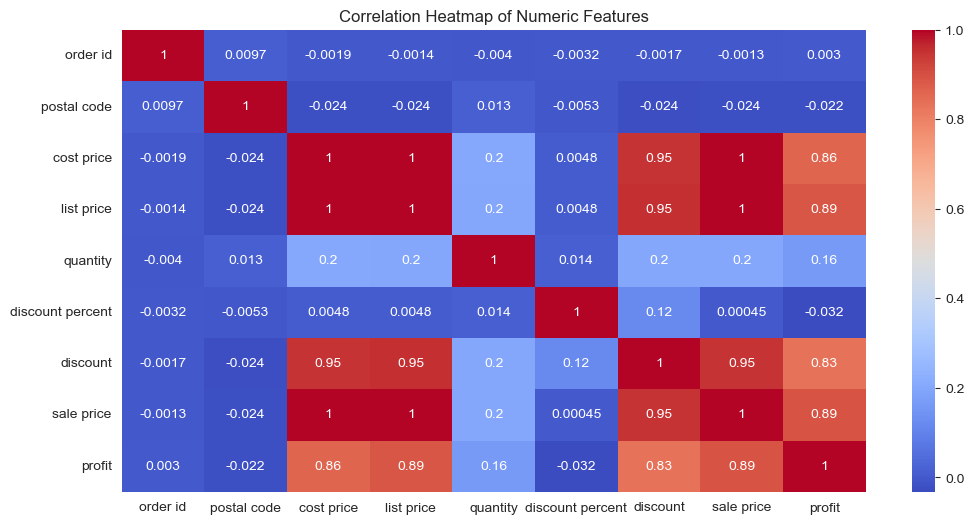

In [33]:
#Correlation heatmap of numeric columns
numeric_df = retail_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

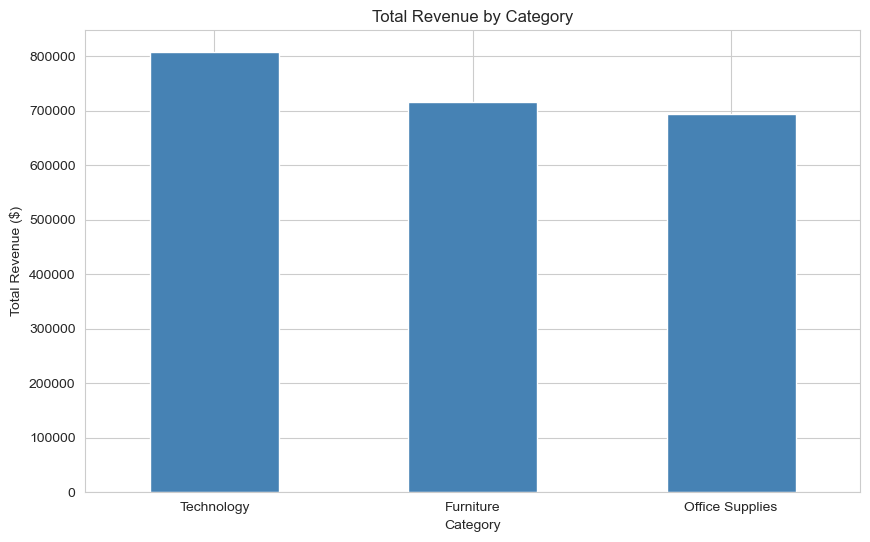


Revenue by Category:
category
Technology         806873.5
Furniture          715340.7
Office Supplies    693644.5
Name: sale price, dtype: float64


In [44]:
#Bar chart showing total revenue by Category
category_revenue = retail_df.groupby('category')['sale price'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
category_revenue.plot(kind='bar', color='steelblue', ax=ax)
ax.set_xlabel('Category')
ax.set_ylabel('Total Revenue ($)')
ax.set_title('Total Revenue by Category')
plt.xticks(rotation=0)
plt.show()

print("\nRevenue by Category:")
print(category_revenue)

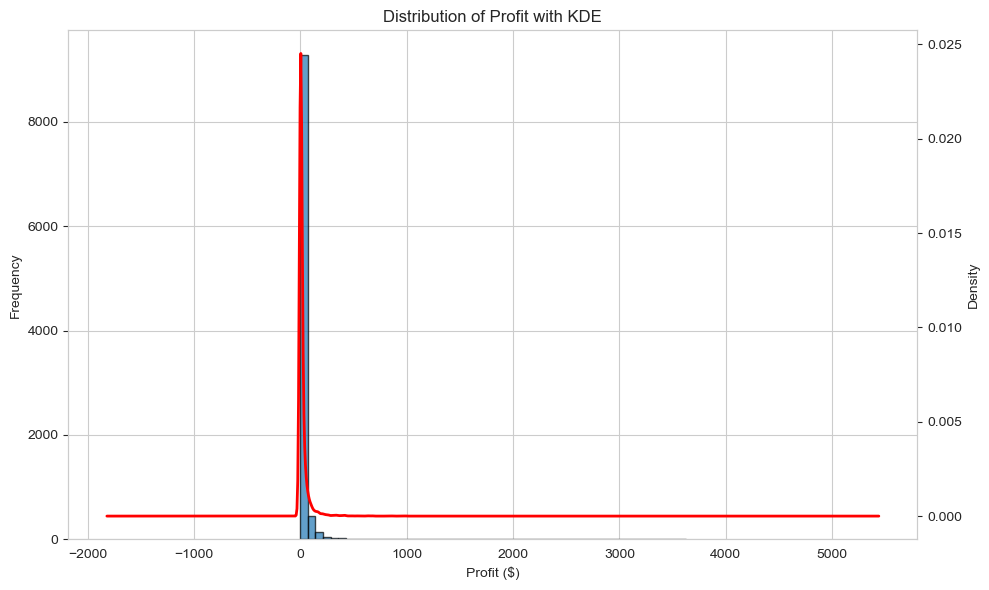

In [36]:
#Histogram of Profit with KDE
fig, ax = plt.subplots(figsize=(10, 6))
retail_df['profit'].hist(bins=50, edgecolor='black', alpha=0.7, ax=ax)
retail_df['profit'].plot(kind='kde', ax=ax, secondary_y=True, linewidth=2, color='red')
ax.set_xlabel('Profit ($)')
ax.set_ylabel('Frequency')
ax.right_ax.set_ylabel('Density')
plt.title('Distribution of Profit with KDE')
plt.tight_layout()
plt.show()

# Data Visualization

Visual exploration of key metrics and relationships in the dataset.

In [37]:
#drop cost price, list price and discount percent columns

retail_df.drop(['list price', 'cost price', 'discount percent'], axis=1, inplace=True)

retail_df.columns

Index(['order id', 'order date', 'ship mode', 'segment', 'country', 'city',
       'state', 'postal code', 'region', 'category', 'sub category',
       'product id', 'quantity', 'discount', 'sale price', 'profit'],
      dtype='object')

In [45]:
#Export cleaned dataset to CSV
retail_df.to_csv('orders_cleaned.csv', index=False)
print("✅ Cleaned dataset exported to 'orders_cleaned.csv'")
print(f"File contains {len(retail_df)} records and {len(retail_df.columns)} columns")
print(f"\nColumns in exported file:")
print(retail_df.columns.tolist())

✅ Cleaned dataset exported to 'orders_cleaned.csv'
File contains 9994 records and 16 columns

Columns in exported file:
['order id', 'order date', 'ship mode', 'segment', 'country', 'city', 'state', 'postal code', 'region', 'category', 'sub category', 'product id', 'quantity', 'discount', 'sale price', 'profit']


# Conclusion & Data Export

Export the cleaned and processed dataset for further analysis and reporting.

In [17]:
#Connect to sql server 

from sqlalchemy import create_engine

engine = create_engine(
    "mssql+pyodbc://@localhost\\SQLEXPRESS/RetailDB?"
    "driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

conn = engine.connect()

print("✅ Connected to SQL Server successfully")


C:\Users\user\AppData\Local\Temp\ipykernel_49884\2180155450.py:10: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  conn = engine.connect()


✅ Connected to SQL Server successfully


In [18]:
#Persist cleaned retail data to SQL Server using append mode to preserve existing records
#This enables centralized data storage for business intelligence and reporting tools
retail_df.to_sql('df_orders', con=conn, index=False, if_exists = 'append')

38